<a href="https://www.kaggle.com/code/aski1140/municipial-waste-management?scriptVersionId=292720713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/municipal-waste-management-cost-prediction/public_data_waste_fee.csv


# Dataset Variable Definitions

| Variable Name | Description |
|---------------|-------------|
| **region** | Region |
| **province** | Province |
| **name** | Name of municipality |
| **tc** | Cost per capita |
| **eur_cres** | Residual cost per capita |
| **csor** | Sorted cost per capita |
| **istat** | National code |
| **area** | Area (km²) |
| **pop** | Population |
| **alt** | Altitude (meters above sea level) |
| **isle** | Dummy variable for municipality on island |
| **sea** | Dummy variable for coastal municipality |
| **pden** | Population density (people per km²) |
| **wden** | Waste density (per km²) |
| **urb** | Urbanization index (1: low, 3: high) |
| **fee** | Fee scheme |
| **d_fee** | Dummy variable for PAYT |
| **sample** | Region with PAYT |
| **organic** | Organic waste % |
| **paper** | Paper waste % |
| **glass** | Glass waste % |
| **wood** | Wood waste % |
| **metal** | Metal waste % |
| **plastic** | Plastic waste % |
| **raee** | WEEE (Waste Electrical and Electronic Equipment) % |
| **texile** | Textile waste % |
| **other** | Other waste % |
| **msw_so** | Municipal solid waste sorted (kg) |
| **msw_un** | Municipal solid waste unsorted (kg) |
| **msw** | Municipal solid waste (kg) |
| **sor** | Share of sorted waste |
| **geo** | Geographic location (1: South, 2: Center, 3: North) |
| **roads** | Kilometers of roads within the municipality |
| **s_wteregio** | Share of waste sent to Waste-to-Energy plants (regional figure) |
| **s_landfill** | Share of waste to landfill |
| **gdp** | Municipal revenues EUR per capita (log) |
| **proads** | People per km of roads (log) |
| **wage** | Taxable income EUR per capita (log) |
| **finance** | Municipal revenues EUR per capita (log) |

---

## Variable Categories

### 📍 **Geographic Variables**
- region, province, name, area, alt, isle, sea, geo

### 👥 **Demographic Variables**
- pop, pden, urb, proads

### ♻️ **Waste Management Variables**
- organic, paper, glass, wood, metal, plastic, raee, texile, other
- msw_so, msw_un, msw, sor, wden

### 💰 **Financial Variables**
- tc, eur_cres, csor, fee, d_fee, gdp, wage, finance

### 🏗️ **Infrastructure Variables**
- roads, s_wteregio, s_landfill

# CONFIG

In [2]:
class config():

    dir_dataset = "/kaggle/input/municipal-waste-management-cost-prediction/public_data_waste_fee.csv"

# IMPORT DATA and EDA

In [3]:
# Read csv file
df = pd.read_csv(config.dir_dataset)


# Select 19 variable from dataset
input_features = [
    "area",      # Ø₀
    "pop",       # Ø₁
    "alt",       # Ø₂
    "isle",      # Ø₃ (Island dummy)
    "sea",       # Ø₄ (Coastal dummy)
    "pden",      # Ø₅
    "wden",      # Ø₆
    "urb",       # Ø₇
    "organic",   # Ø₈
    "paper",     # Ø₉
    "glass",     # Ø₁₀
    "wood",      # Ø₁₁
    "metal",     # Ø₁₂
    "plastic",   # Ø₁₃
    "raee",      # Ø₁₄
    "texile",    # Ø₁₅
    "other",     # Ø₁₆
    "msw_so",    # Ø₁₇
    "msw_un"     # Ø₁₈
]

# Output variable
output_feature = "msw"  # Ø₁₉

all_features = input_features + [output_feature]

df = df[all_features].copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     4335 non-null   float64
 1   pop      4341 non-null   int64  
 2   alt      4335 non-null   float64
 3   isle     4335 non-null   float64
 4   sea      4335 non-null   float64
 5   pden     4335 non-null   float64
 6   wden     4335 non-null   float64
 7   urb      4335 non-null   float64
 8   organic  3829 non-null   float64
 9   paper    4316 non-null   float64
 10  glass    4308 non-null   float64
 11  wood     3246 non-null   float64
 12  metal    4095 non-null   float64
 13  plastic  4302 non-null   float64
 14  raee     4027 non-null   float64
 15  texile   3328 non-null   float64
 16  other    4205 non-null   float64
 17  msw_so   4341 non-null   float64
 18  msw_un   4341 non-null   int64  
 19  msw      4341 non-null   int64  
dtypes: float64(17), int64(3)
memory usage: 678.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,4335.0,4.099504e+01,5.678403e+01,1.200000e-01,10.850000,2.273000e+01,4.749000e+01,1.287390e+03
pop,4341.0,1.020384e+04,5.342640e+04,3.400000e+01,1579.000000,3.535000e+03,8.199000e+03,2.617175e+06
alt,4335.0,3.100521e+02,2.805343e+02,1.000000e+00,80.000000,2.400000e+02,4.590000e+02,1.816000e+03
isle,4335.0,5.074971e-03,7.106603e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
sea,4335.0,1.683968e-01,3.742614e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
pden,4335.0,4.050483e+02,7.712120e+02,2.479942e+00,62.588707,1.513236e+02,3.993648e+02,1.212283e+04
wden,4335.0,1.920578e+05,3.590014e+05,8.921848e+02,23571.346680,6.834259e+04,1.946250e+05,4.978556e+06
urb,4335.0,2.489965e+00,5.948001e-01,1.000000e+00,2.000000,3.000000e+00,3.000000e+00,3.000000e+00
organic,3829.0,2.227513e+01,1.274530e+01,1.371244e-02,11.127275,2.496855e+01,3.182242e+01,6.163912e+01
paper,4316.0,1.096127e+01,3.883149e+00,1.145603e-05,8.655753,1.087905e+01,1.306169e+01,4.528813e+01


## Probablity Distribution of Features 

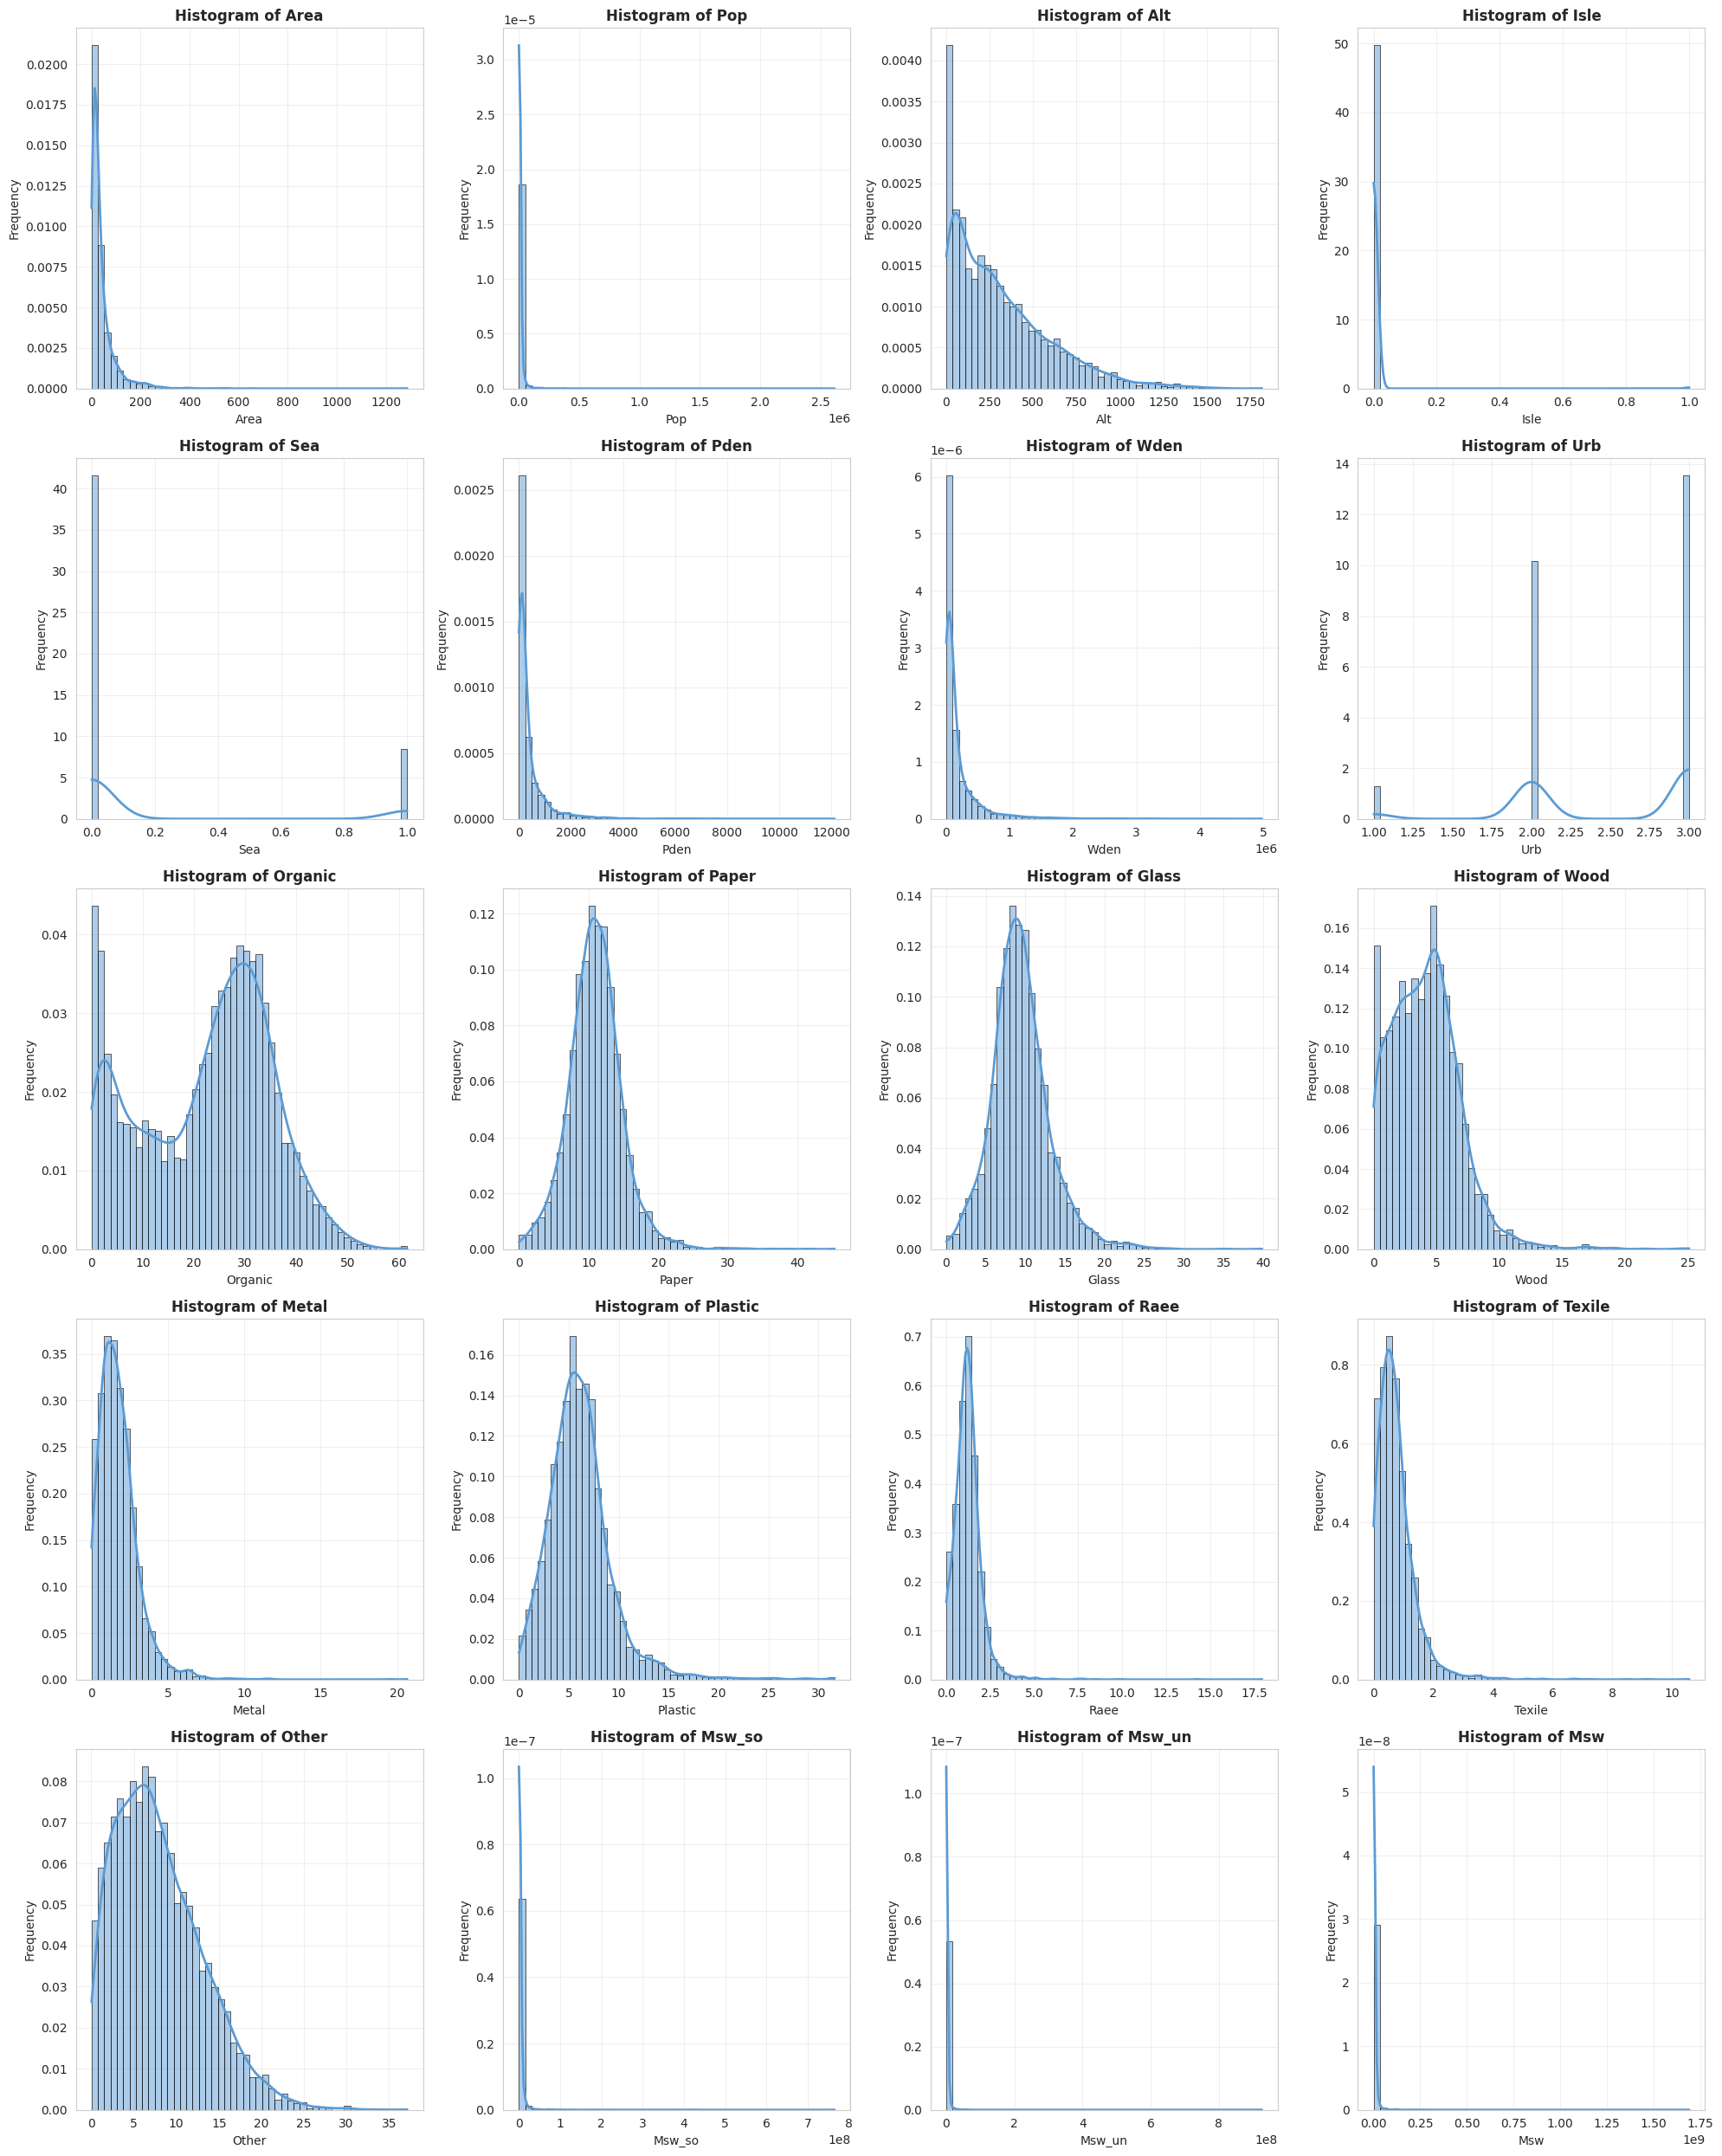

In [6]:
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20, 25))

axes = axes.flatten()


# Plot histogram for each features
for idx, feature in enumerate(all_features):
    ax = axes[idx]
    
    # Histogram + KDE Graph 
    sns.histplot(
        data=df, 
        x=feature, 
        kde=True,  # Add KDE
        color="#5B9BD5", 
        edgecolor="black",
        line_kws={"color": "red", "linewidth": 2},  # KDE color is red 
        stat="density", 
        bins=50,
        ax=ax
    )
    
    # Set titles and x,y labesl
    ax.set_title(f"Histogram of {feature.capitalize()}", fontsize=12, fontweight="bold")
    ax.set_xlabel(f"{feature.capitalize()}", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## IMPUTE

Makalede hangi Impute yöntemini kullandıklarını söylemediler. Ben kafama göre KNN Impute  yöntemi uyguladım

In [7]:
from sklearn.impute import KNNImputer

In [8]:
# Impute 

imputer = KNNImputer(n_neighbors = 5, metric = "nan_euclidean", weights = "distance")

df = pd.DataFrame(imputer.fit_transform(df), columns = all_features)

# MODELING

Makalede hangi scale yöntemini kullandıklarını söylemediler. Ben kafama göre MinMax Scale yöntemi uyguladım. Ayrıca makalede hangi hiperparametreleri kullandıklarını söylemediler bende kendi kafama göre uyguladım.

In [9]:
from sklearn.model_selection import  train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge

import tensorflow as tf
from tensorflow import keras
from keras import layers, models, callbacks

2026-01-19 11:29:28.379141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768822168.636055      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768822168.714290      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768822169.338751      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768822169.338805      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768822169.338809      55 computation_placer.cc:177] computation placer alr

In [10]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# ========================================
# 1. DATA PREPARATION
# ========================================

print("="*60)
print("DATA PREPARATION")
print("="*60)

# Select input and output features
X = df[input_features].copy()
y = df[output_feature].copy()


# ========================================
# 2. DATA SPLITTING
# ========================================

print("\n" + "="*60)
print("DATA SPLITTING")
print("="*60)


# Single split: 3,300 (train) + 1,041 (test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=1041, 
    random_state=45, 
    shuffle=True
)

print(f"\n Data Split Summary:")
print(f"   Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test Set:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Total:        {len(X)} samples")
print(f"\n   → K-Fold CV will be performed on Training Set ({X_train.shape[0]} samples)")
print(f"   → Final evaluation on Test Set ({X_test.shape[0]} samples)")

# ========================================
# 3. NORMALIZATION
# ========================================


print("\n" + "="*60)
print("NORMALIZATION")
print("="*60)


scaler_X = RobustScaler()
scaler_y = RobustScaler()

# Fit on training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Transform test
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

print(" Normalization completed!")
print(f"\n Scaled Data Statistics:")
print(f"   X_train: 25%={np.percentile(X_train_scaled, 25):.4f}, median={np.percentile(X_train_scaled, 50):.4f}, 75%={np.percentile(X_train_scaled, 75):.4f}")
print(f"   y_train: 25%={np.percentile(y_train_scaled, 25):.4f}, median={np.percentile(y_train_scaled, 50):.4f}, 75%={np.percentile(y_train_scaled, 75):.4f}")
print(f"   X_test:  25%={np.percentile( X_test_scaled, 25):.4f}, median={np.percentile( X_test_scaled, 50):.4f}, 75%={np.percentile( X_test_scaled, 75):.4f}")
print(f"   y_test:  25%={np.percentile( y_test_scaled, 25):.4f}, median={np.percentile( y_test_scaled, 50):.4f}, 75%={np.percentile( y_test_scaled, 75):.4f}")


# 4. EVALUATION METRICS FUNCTIONS
# ========================================

def calculate_metrics(y_true, y_pred, scaler_y, prefix: str = "Train"):
    """Calculate ARE, AARE, SD, MSE, RMSE, R² metrics"""

    
    print(f"\n{'*'*40}")
    print(f"METRICS CALCULATION DEBUG - {prefix}")
    print(f"{'*'*40}")
    
    print(f"\n BEFORE Inverse Transform:")
    print(f"   True Y:  25%={np.percentile(y_true, 25):.4f}, median={np.percentile(y_true, 50):.4f}, 75%={np.percentile(y_true, 75):.4f}")
    print(f"   Pred Y:  25%={np.percentile(y_pred, 25):.4f}, median={np.percentile(y_pred, 50):.4f}, 75%={np.percentile(y_pred, 75):.4f}")
    
    # Inverse transform to original scale
    y_true_original = scaler_y.inverse_transform(y_true.reshape(-1, 1)).ravel()
    y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()


    print(f"\n AFTER Inverse Transform (Original Scale):")
    print(f"   True Y:  25%={np.percentile(y_true_original, 25):.4f}, median={np.percentile(y_true_original, 50):.4f}, 75%={np.percentile(y_true_original, 75):.4f}")
    print(f"   Pred Y:  25%={np.percentile(y_pred_original, 25):.4f}, median={np.percentile(y_pred_original, 50):.4f}, 75%={np.percentile(y_pred_original, 75):.4f}")
    
    print(f"\n{'*'*40}")
    print(f"METRICS CALCULATION DEBUG - {prefix} END")
    print(f"{'*'*40}")
    
    
    # Avoid division by zero
    y_true_original = np.where(y_true_original == 0, 1e-10, y_true_original)
    
    # ARE: Average Relative Error
    relative_errors = (y_true_original - y_pred_original) / y_true_original
    ARE = np.mean(relative_errors)
    
    # AARE: Average Absolute Relative Error
    AARE = np.mean(np.abs(relative_errors))
    
    # SD: Standard Deviation of errors
    errors = y_true_original - y_pred_original
    SD = np.std(errors)
    
    # MSE: Mean Squared Error
    MSE = mean_squared_error(y_true_original, y_pred_original)
    
    # RMSE: Root Mean Squared Error
    RMSE = np.sqrt(MSE)
    
    # R²: R-squared
    R2 = r2_score(y_true_original, y_pred_original)
    
    return {
        f"{prefix}_ARE": ARE,
        f"{prefix}_AARE": AARE,
        f"{prefix}_SD": SD,
        f"{prefix}_MSE": MSE,
        f"{prefix}_RMSE": RMSE,
        f"{prefix}_R2": R2
    }

# ========================================
# 5. MODEL BUILDING FUNCTIONS
# ========================================

def create_cnn_model(input_shape):
    """CNN Model"""
    model = models.Sequential([
        # Input
        layers.Input(shape=input_shape),
        
        # BLOCK 1 - VGG-style (64 filters)
        layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        
        # BLOCK 2 - VGG-style (128 filters)
        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        
        # BLOCK 3 - VGG-style (256 filters)
        layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        
        # BLOCK 4 - Deeper features (512 filters)
        layers.Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        
        # FULLY CONNECTED LAYERS
        layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        
        layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        
        layers.Dense(128, activation='relu'),
        
        layers.Dense(64, activation='relu'),
        
        # Output Layer
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mae"]
    )
    
    return model


def create_mlp_model(input_dim):
    """MLP Model"""
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        
        # Hidden Layer 1 
        layers.Dense(32, activation='relu'),
        
        # Hidden Layer 2
        layers.Dense(32, activation='relu'),
        
        # Output Layer
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',  # More robust to outliers
        metrics=['mae']
    )
    
    return model


def create_svm():
    """Create SVM parameters Model"""
    
    model = SVR(
        kernel='rbf',
        C=1,
        gamma='scale',
        epsilon=0.001,
        max_iter=10000
    )
    
    return model


def create_lr():
    """Ridge Regression (L2 regularization)"""
    
    model = Ridge(
        alpha=1.0,
        solver='auto',
        random_state=42
    )
    
    return model

# ========================================
# 6. K-FOLD CROSS VALIDATION FUNCTION
# ========================================

def k_fold_cross_validation(X_train_data, 
                            y_train_data, 
                            X_test_data, 
                            y_test_data, 
                            model_type, 
                            k=6, 
                            n_rounds=1, 
                            scaler_y=None, 
                            verbose=1): 
    """
    
    Parameters:
    -----------
    X_train_data: training features
    y_train_data: training target
    X_test_data: test features
    y_test_data: test target
    model_type: str, one of ["CNN", "MLP", "SVM", "LR"]
    k: int, number of folds (default=6)
    n_rounds: int, number of rounds (default=1)
    scaler_y: fitted scaler for inverse transform
    verbose: int, verbosity level
    """
    
    print(f"\n{'='*60}")
    print(f"K-FOLD CROSS VALIDATION: {model_type}")
    print(f"k={k} folds, {n_rounds} round(s) → Total {k*n_rounds} validation runs")
    print(f"{'='*60}")
    
    all_results = []

    
    if model_type == "CNN":
        X_test_cnn = X_test_data.reshape(X_test_data.shape[0], 
                                         X_test_data.shape[1], 1)
    
    for round_idx in range(n_rounds):
        if verbose >= 1:
            print(f"\n{'='*80}")
            print(f"\n  Round {round_idx + 1}/{n_rounds}")
            print(f"\n{'='*80}")
        
        # K-Fold split
        kfold = KFold(n_splits=k, shuffle=True, random_state=42)
        
        for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_data)):
            if verbose >= 1:
                print(f"\n{'='*60}")
                print(f"   Fold {fold_idx + 1}/{k}...", end=" ")
                print(f"\n{'='*60}")
           
            if isinstance(X_train_data, pd.DataFrame):
                X_train_fold = X_train_data.iloc[train_idx].values
                X_val_fold = X_train_data.iloc[val_idx].values
            else:
                X_train_fold = X_train_data[train_idx]
                X_val_fold = X_train_data[val_idx]
            
            if isinstance(y_train_data, pd.Series):
                y_train_fold = y_train_data.iloc[train_idx].values
                y_val_fold = y_train_data.iloc[val_idx].values
            else:
                y_train_fold = y_train_data[train_idx]
                y_val_fold = y_train_data[val_idx]
            
            # Train model based on type
            if model_type == "CNN":
                # Reshape for CNN
                X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], 
                                                    X_train_fold.shape[1], 1)
                X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], 
                                                X_val_fold.shape[1], 1)
                
                
                
                model = create_cnn_model((X_train_cnn.shape[1], 1))
                
                early_stop = callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=20,
                    restore_best_weights=True,
                    verbose=0
                )
                
                reduce_lr = callbacks.ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.5,
                    patience=25,
                    min_lr=1e-7,
                    verbose=0
                )
                
                model.fit(
                    X_train_cnn, y_train_fold,
                    validation_data=(X_val_cnn, y_val_fold),
                    epochs=500,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr],
                    verbose=0
                )
                y_train_pred = model.predict(X_train_cnn, verbose=0).ravel()
                y_val_pred = model.predict(X_val_cnn, verbose=0).ravel()
                y_test_pred = model.predict(X_test_cnn, verbose=0).ravel()
                
            elif model_type == "MLP":
                model = create_mlp_model(X_train_fold.shape[1])
                
                early_stop = callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=25,
                    restore_best_weights=True,
                    verbose=0
                )
                
                reduce_lr = callbacks.ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.5,
                    patience=25,
                    min_lr=1e-7,
                    verbose=0
                )
                
                model.fit(
                    X_train_fold, y_train_fold,
                    validation_data=(X_val_fold, y_val_fold),
                    epochs=500,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr],
                    verbose=0 
                )
                
                y_train_pred = model.predict(X_train_fold, verbose=0).ravel()
                y_val_pred = model.predict(X_val_fold, verbose=0).ravel()
                y_test_pred = model.predict(X_test_data, verbose=0).ravel()
                
            elif model_type == "SVM":
                model = create_svm()
                model.fit(X_train_fold, y_train_fold)
                y_train_pred = model.predict(X_train_fold)
                y_val_pred = model.predict(X_val_fold)
                y_test_pred = model.predict(X_test_data)
                
            elif model_type == "LR":
                model = create_lr()
                model.fit(X_train_fold, y_train_fold)
                y_train_pred = model.predict(X_train_fold)
                y_val_pred = model.predict(X_val_fold)
                y_test_pred = model.predict(X_test_data)
            
            else:
                raise ValueError(f"Unknown model_type: {model_type}")
            
            # Calculate metrics for train, val and test set

            metrics_train = calculate_metrics(
                y_train_fold,      
                y_train_pred,      
                scaler_y,         # inverse transform için
                prefix = "Train"
            )

            metrics_val = calculate_metrics(
                y_val_fold,      
                y_val_pred,      
                scaler_y,
                prefix = "Val"        
            )

            metrics_test = calculate_metrics(
                y_test_data,      
                y_test_pred,      
                scaler_y,
                prefix = "Test"          
            )

            
            
            all_results.append({
                "round": round_idx + 1,
                "fold": fold_idx + 1,
                **metrics_train,
                **metrics_val,
                **metrics_test
            })
            
            if verbose >= 1:
                print(f"Metrics in Train: R²={metrics_train['Train_R2']:.4f}, RMSE={metrics_train['Train_RMSE']:.2f}\n")
                print(f"Metrics in Val:   R²={metrics_val['Val_R2']:.4f}, RMSE={metrics_val['Val_RMSE']:.2f}\n")
                print(f"Metrics in Test:  R²={metrics_test['Test_R2']:.4f}, RMSE={metrics_test['Test_RMSE']:.2f}\n")
    
    # Convert to DataFrame
    results_df = pd.DataFrame(all_results)
    
    # Calculate statistics train, val and test set

    # Train Set
    train_avg_metrics = {
        "ARE_mean": results_df["Train_ARE"].mean(),
        "ARE_std": results_df["Train_ARE"].std(),
        "AARE_mean": results_df["Train_AARE"].mean(),
        "AARE_std": results_df["Train_AARE"].std(),
        "SD_mean": results_df["Train_SD"].mean(),
        "SD_std": results_df["Train_SD"].std(),
        "MSE_mean": results_df["Train_MSE"].mean(),
        "MSE_std": results_df["Train_MSE"].std(),
        "RMSE_mean": results_df["Train_RMSE"].mean(),
        "RMSE_std": results_df["Train_RMSE"].std(),
        "R2_mean": results_df["Train_R2"].mean(),
        "R2_std": results_df["Train_R2"].std(),
        "Best_R2": results_df["Train_R2"].max(),
        "Best_RMSE": results_df["Train_RMSE"].min()
    }
    
    print(f"\n  {model_type} K-Fold Completed!")
    print(f"\n  Average Results ({k*n_rounds} runs for Train Set):")
    print(f"   R² = {train_avg_metrics['R2_mean']:.4f} ± {train_avg_metrics['R2_std']:.4f}")
    print(f"   RMSE = {train_avg_metrics['RMSE_mean']:.2f} ± {train_avg_metrics['RMSE_std']:.2f}")
    print(f"   Best R² = {train_avg_metrics['Best_R2']:.4f}")
    print(f"   Best RMSE = {train_avg_metrics['Best_RMSE']:.2f}")

    print(f"*"*60)

    # Val Set
    val_avg_metrics = {
        "ARE_mean": results_df["Val_ARE"].mean(),
        "ARE_std": results_df["Val_ARE"].std(),
        "AARE_mean": results_df["Val_AARE"].mean(),
        "AARE_std": results_df["Val_AARE"].std(),
        "SD_mean": results_df["Val_SD"].mean(),
        "SD_std": results_df["Val_SD"].std(),
        "MSE_mean": results_df["Val_MSE"].mean(),
        "MSE_std": results_df["Val_MSE"].std(),
        "RMSE_mean": results_df["Val_RMSE"].mean(),
        "RMSE_std": results_df["Val_RMSE"].std(),
        "R2_mean": results_df["Val_R2"].mean(),
        "R2_std": results_df["Val_R2"].std(),
        "Best_R2": results_df["Val_R2"].max(),
        "Best_RMSE": results_df["Val_RMSE"].min()
    }
    
    print(f"\n  {model_type} K-Fold Completed!")
    print(f"\n  Average Results ({k*n_rounds} runs for Val Set):")
    print(f"   R² = {val_avg_metrics['R2_mean']:.4f} ± {val_avg_metrics['R2_std']:.4f}")
    print(f"   RMSE = {val_avg_metrics['RMSE_mean']:.2f} ± {val_avg_metrics['RMSE_std']:.2f}")
    print(f"   Best R² = {val_avg_metrics['Best_R2']:.4f}")
    print(f"   Best RMSE = {val_avg_metrics['Best_RMSE']:.2f}")

    print(f"*"*60)

    # Test Set

    test_avg_metrics = {
        "ARE_mean": results_df["Test_ARE"].mean(),
        "ARE_std": results_df["Test_ARE"].std(),
        "AARE_mean": results_df["Test_AARE"].mean(),
        "AARE_std": results_df["Test_AARE"].std(),
        "SD_mean": results_df["Test_SD"].mean(),
        "SD_std": results_df["Test_SD"].std(),
        "MSE_mean": results_df["Test_MSE"].mean(),
        "MSE_std": results_df["Test_MSE"].std(),
        "RMSE_mean": results_df["Test_RMSE"].mean(),
        "RMSE_std": results_df["Test_RMSE"].std(),
        "R2_mean": results_df["Test_R2"].mean(),
        "R2_std": results_df["Test_R2"].std(),
        "Best_R2": results_df["Test_R2"].max(),
        "Best_RMSE": results_df["Test_RMSE"].min()
    }
    
    print(f"\n  {model_type} K-Fold Completed!")
    print(f"\n  Average Results ({k*n_rounds} runs for Test Set):")
    print(f"   R² = {test_avg_metrics['R2_mean']:.4f} ± {test_avg_metrics['R2_std']:.4f}")
    print(f"   RMSE = {test_avg_metrics['RMSE_mean']:.2f} ± {test_avg_metrics['RMSE_std']:.2f}")
    print(f"   Best R² = {test_avg_metrics['Best_R2']:.4f}")
    print(f"   Best RMSE = {test_avg_metrics['Best_RMSE']:.2f}")

    print(f"*"*60)
    
    return {
        "all_results": results_df,
        "train_avg_metrics": train_avg_metrics,
        "val_avg_metrics": val_avg_metrics,
        "test_avg_metrics": test_avg_metrics,
        "model_type": model_type
    }

def get_results_csv_file(results,
                        models_to_test: dict = {"SVM", "LR", "CNN", "MLP"},
                        looking_feature: str = "train_avg_metrics"):

    summary_data = []
    for model_name in models_to_test:
        avg = results[model_name][looking_feature]
        summary_data.append({
            "Model": model_name,
            "ARE": avg["ARE_mean"],
            "AARE": avg["AARE_mean"],
            "SD": avg["SD_mean"],
            "MSE": avg["MSE_mean"],
            "RMSE": avg["RMSE_mean"],
            "R2": avg["R2_mean"]
        })
    
    table_kfold = pd.DataFrame(summary_data)
    print("\n" + table_kfold.to_string(index=False))

    # Save results
    table_kfold.to_csv(f"{looking_feature}_table_1_kfold_results.csv", index=False)

    return table_kfold

# ========================================
# RUN K-FOLD FOR ALL MODELS
# ========================================

print("\n" + "="*60)
print("K-FOLD CROSS VALIDATION (k=6)")
print("="*60)

models_to_test = ["SVM", "LR","MLP"] #  "CNN", 
kfold_results = {}

for model_name in models_to_test:
    kfold_results[model_name] = k_fold_cross_validation(
        X_train_data=X_train_scaled, 
        y_train_data=y_train_scaled,
        X_test_data=X_test_scaled,
        y_test_data=y_test_scaled,  
        model_type=model_name,
        k=6,
        n_rounds=1,
        scaler_y=scaler_y,  
        verbose=1
    )

# ========================================
# 8. K-FOLD SUMMARY TABLE
# ========================================

print("\n" + "="*60)
print("TABLE 1: K-FOLD CV RESULTS (Train, Val and Test Set)")
print("="*60)


# Print Results and Get CSV File for train, val and test set
train_table = get_results_csv_file(results = kfold_results,
                                   looking_feature = "train_avg_metrics",
                                   models_to_test  = models_to_test)

val_table = get_results_csv_file(results = kfold_results,
                                 looking_feature = "val_avg_metrics",
                                 models_to_test  = models_to_test)

test_table = get_results_csv_file(results = kfold_results,
                                  looking_feature = "test_avg_metrics",
                                  models_to_test  = models_to_test)



for model_name in models_to_test:
    kfold_results[model_name]["all_results"].to_csv(
        f"kfold_detailed_{model_name}.csv", 
        index=False
    )

print("\n  K-Fold results saved!")
print("\n" + "="*60)
print("K-FOLD CROSS VALIDATION COMPLETED!")
print("="*60)

DATA PREPARATION

DATA SPLITTING

 Data Split Summary:
   Training Set: 3300 samples (76.0%)
   Test Set:     1041 samples (24.0%)
   Total:        4341 samples

   → K-Fold CV will be performed on Training Set (3300 samples)
   → Final evaluation on Test Set (1041 samples)

NORMALIZATION
 Normalization completed!

 Scaled Data Statistics:
   X_train: 25%=-0.3330, median=0.0000, 75%=0.4485
   y_train: 25%=-0.2741, median=0.0000, 75%=0.7259
   X_test:  25%=-0.3250, median=0.0000, 75%=0.4666
   y_test:  25%=-0.2677, median=0.0072, 75%=0.7446

K-FOLD CROSS VALIDATION (k=6)

K-FOLD CROSS VALIDATION: SVM
k=6 folds, 1 round(s) → Total 6 validation runs


  Round 1/1


   Fold 1/6... 

****************************************
METRICS CALCULATION DEBUG - Train
****************************************

 BEFORE Inverse Transform:
   True Y:  25%=-0.2770, median=-0.0132, 75%=0.7190
   Pred Y:  25%=-0.2606, median=-0.0024, 75%=0.7202

 AFTER Inverse Transform (Original Scale):
   True Y:  25%=5992

2026-01-19 11:29:51.756188: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



****************************************
METRICS CALCULATION DEBUG - Train
****************************************

 BEFORE Inverse Transform:
   True Y:  25%=-0.2770, median=-0.0132, 75%=0.7190
   Pred Y:  25%=-0.2726, median=-0.0153, 75%=0.7229

 AFTER Inverse Transform (Original Scale):
   True Y:  25%=599280.2500, median=1473728.5000, 75%=3900838.2500
   Pred Y:  25%=613834.1875, median=1466708.2500, 75%=3913489.0000

****************************************
METRICS CALCULATION DEBUG - Train END
****************************************

****************************************
METRICS CALCULATION DEBUG - Val
****************************************

 BEFORE Inverse Transform:
   True Y:  25%=-0.2641, median=0.0641, 75%=0.7558
   Pred Y:  25%=-0.2546, median=0.0889, 75%=0.7476

 AFTER Inverse Transform (Original Scale):
   True Y:  25%=641956.2500, median=1729710.5000, 75%=4022502.5000
   Pred Y:  25%=673447.2500, median=1811979.5000, 75%=3995413.7500

****************************